<p style="text-align:center">
    <a href="https://nbviewer.jupyter.org/github/twMr7/Python-Machine-Learning/blob/master/12-Matplotlib_Data_Visualization.ipynb">
        Open In Jupyter nbviewer
        <img style="float: center;" src="https://nbviewer.jupyter.org/static/img/nav_logo.svg" width="120" />
    </a>
</p>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/twMr7/Python-Machine-Learning/blob/master/12-Matplotlib_Data_Visualization.ipynb)

# 12. Matplotlib 資料視覺化

**Matplotlib** 建構在 Numpy 陣列的基礎上，廣泛與 SciPy 家族的模組運作良好，是 Python 程式平台上最常使用的資料視覺化套件。 讓她如此受歡迎的最重要特點是，Matplotlib 可跨不同作業系統平台運作，而且和許多建構圖形的底層工具互通性良好。

以下教材內容節錄自 [Matplotlib 使用者手冊](https://matplotlib.org/users/index.html)。

+ [**12.1 基本概念**](#general-concepts)
+ [**12.2 使用 Axes**](#axes-tutorial)


In [1]:
# 起始 notebook 互動環境，另一種選項是 inline
%matplotlib notebook
# 注意： 若使用 Google Colab 環境，請改成 inline

# 載入必要的模組
import numpy as np
import matplotlib.pyplot as plt

<a id="general-concepts"></a>

## 12.1 基本概念

Matplotlib 套件包含相當多的類別模組，[`matplotlib.pyplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html) 是其中最主要提供高階介面的模組，最上層的繪圖狀態機環境（state-machine environment）就是由 `pyplot` 模組所提供，在這一個層次的繪圖環境下，可以使用簡單的函式把繪圖元素（如： 點、線、文字標籤）加到目前 **figure** 作用中的 **axes** 裡。

往下一個階層是 Matplotlib 的物件導向介面（object-oriented interface），這裡的 `pyplot` 功能只會用來明確建立及維護 **figure** 和 **axes** 物件。 在這一個層介面裡，使用者要先明確使用 `pyplot` 產生 figure，再透過所產生的 figure 物件建立一個或多個 axes 物件，再使用 axes 物件來執行大多數的繪圖任務。

要注意的是：
+ 這兩種介面形成了兩種不同的程式風格，兩種各有不同的適用場合，但要避免兩種風格混合使用（就像這個教材）。
+ 絕大多數接受資料繪製圖形物件的函式，都要求接受 `numpy.ndarray` 或 `numpy.ma.masked_array` 或相容類型（如：List）的輸入參數。

### § 認識 Figure、Axes 及其他組成部件

+ **Figure** - 可使用 [`pyplot.figure()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) 建立，一個 figure 可以包含很多的 axes。
+ **Axes** - 可使用 [`pyplot.subplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) 建立，axes 是實際匯出圖形或影像的區域，一個 axes 物件只能屬於一個 figure，axes 區域裡通常使用兩個垂直座標軸 x axis 與 y axis 來繪製二維資料圖形。
+ **Line2D** 及 **Markers** - 可使用 [`pyplot.plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) 或 [`axes.plot()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) 建立。

![figure_anatomy.png](https://matplotlib.org/stable/_images/anatomy.png)

<IPython.core.display.Javascript object>


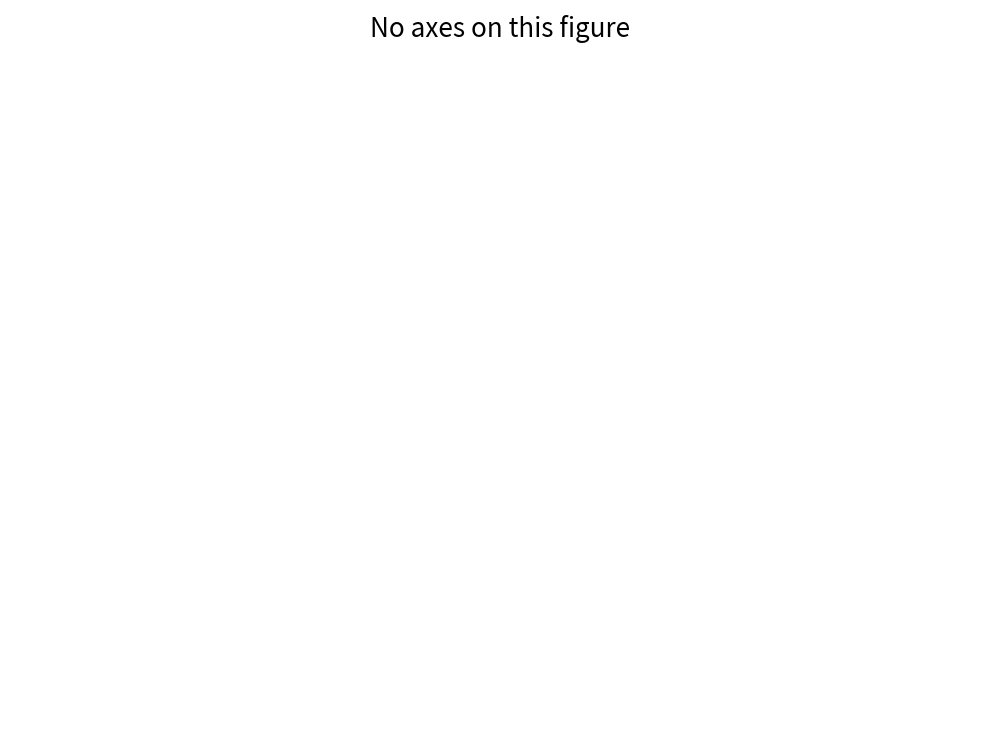

<IPython.core.display.Javascript object>


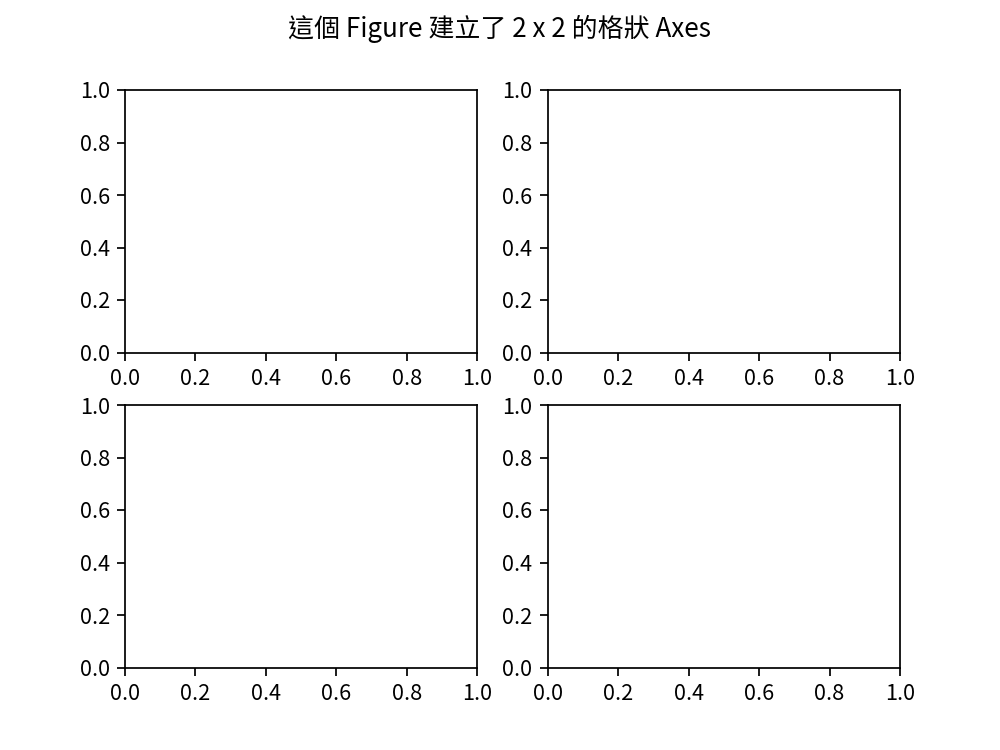

Text(0.5, 0.98, '這個 Figure 建立了 2 x 2 的格狀 Axes')

In [2]:
# 建立一個空的 figure，沒有任何 axes
fig = plt.figure()
fig.suptitle('No axes on this figure') 

# 如果系統有適合的字型的話，設定字體以支援中文字顯示
#plt.rcParams['font.sans-serif'] = 'Noto Sans CJK TC'

# 建立一個用 2 x 2 排列 axes 的 figure
fig, ax = plt.subplots(2, 2)
# 如果有中文支援的話，Figure上才能顯示中文
#fig.suptitle('這個 Figure 建立了 2 x 2 的格狀 Axes') 
fig.suptitle('This figure has a 2x2 grid of Axes') 

### § 高階簡潔的 MATLAB 風格

這個模式的風格建構在物件導向的介面之上，刻意模仿 MATLAB 實驗環境的 plot 形式。 由 Pyplot 提供的繪圖狀態機會在暗中自動建立 figure 及 axes 物件，以支持繪圖函式要建構的繪圖元素，並持續追蹤目前繪圖區域物件以及後續的指令。 如下範例：


<IPython.core.display.Javascript object>


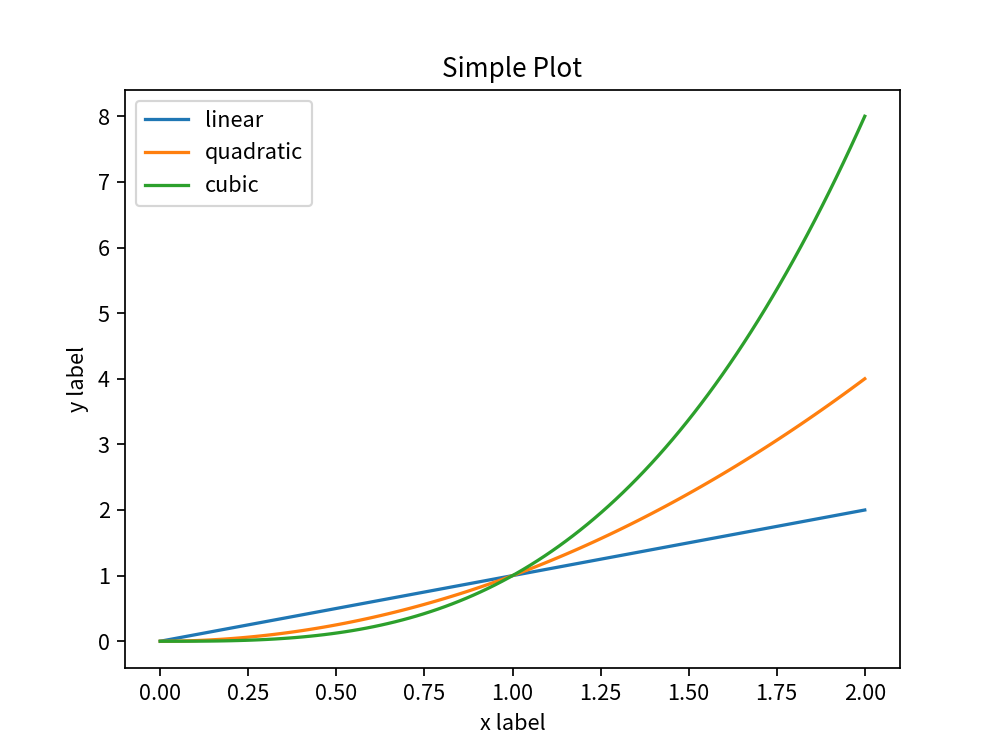

In [3]:
# 產生資料點
x = np.linspace(0, 2, 100)

# 全程使用 pyplot 方法
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")
plt.legend()


在第一個呼叫 `plt.plot()` 繪製一條直線時，狀態機就自動建立一個必要的 figure 及 axes 物件，並記住目前使用的繪圖區域是剛剛建立的 axes 物件，然後將線段畫上作用中的繪圖區域，接下來連續的 `plt.plot()` 呼叫也重複使用現階段作用中的 axes 來繪製其他曲線。 因為沒有新建立或切換至其他作用中 axes，所以之後所有進行軸標籤、標題、和圖例的設定，也都是自動套用至目前作用中 axes 的繪圖區域上。


### § 物件導向風格

使用物件導向介面的程式風格，通常流程都是這樣：
1. 取得 numpy 陣列資料。
2. 呼叫 `figure = plt.figure()` 建立 figure 物件。
3. 呼叫 `axes = plt.subplot()` 建立/新增 axes 物件。
4. 使用 axes 物件參考來建構其他繪圖物件。

或是

1. 取得 numpy 陣列資料。
2. 呼叫 `figure, axes = plt.subplots()` 同時建立 figure 及 axes 物件。
3. 使用 axes 物件的方法來建構其他繪圖物件。

由於每次建構繪圖物件都指定物件參考，語法比較羅嗦，但是比較明確清楚繪製的目標物件。 當繪圖部分的程式變得複雜後，這樣的明確風格會開始顯現他的價值，物件導向式的介面會使得程式比較容易維護，可讀性也較高。


<IPython.core.display.Javascript object>


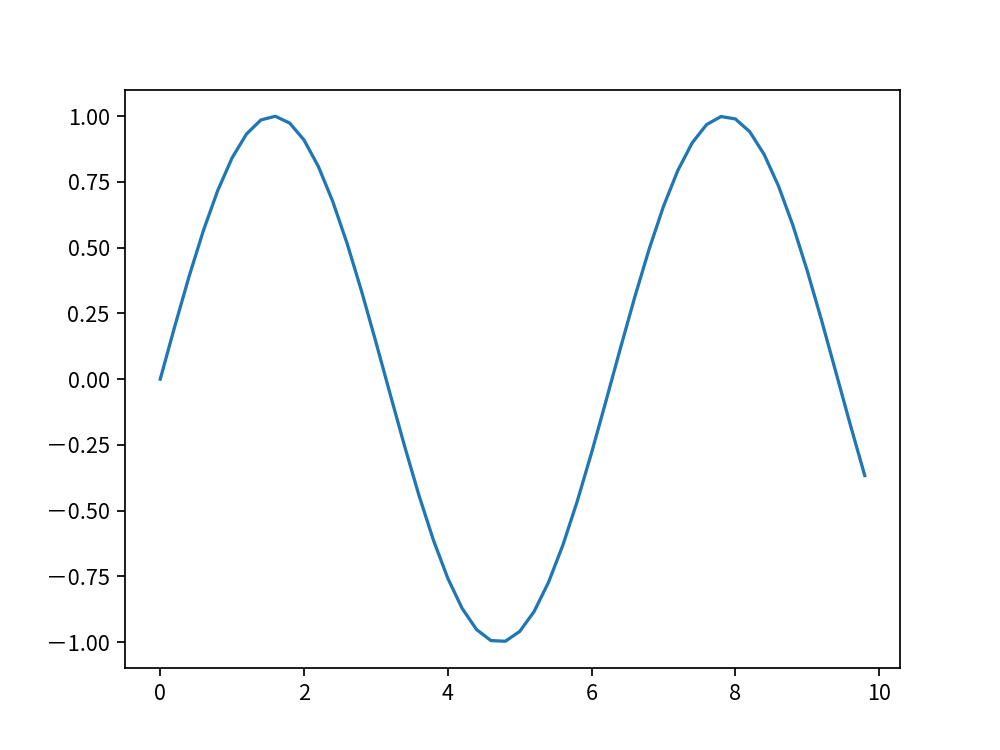

In [4]:
# 產生資料點並套用 sin 函數
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# 產生 figure 及 axes 物件
fig, ax = plt.subplots()
# 使用 axes 物件繪圖
ax.plot(x, y)

### § `interactive` 模式

不管使用那一種風格，都需注意 matplotlib 的 ***interactive*** 模式，目前是開或關可以用 `matplotlib.is_interactive()` 檢驗。 開啟或關閉的控制方式：

+ `matplotlib.pyplot.ion()` 開啟 interactive 模式
+ `matplotlib.pyplot.ioff()` 關閉 interactive 模式
 
在 *interactive* 模式開啟時，任何會更新繪圖元素的函式都會馬上顯示，所以當下如果還沒有 figure 視窗的話就會產生一個新的 figure，這樣的模式就適合在 iPython 這種互動式的實驗環境中使用。 試著在 `ipython` 或 `jupyter qtconsole` 中一行一行執行一下程式，你應該可以觀察到每次畫面的立即更新。

```
plt.ion()

fig, ax = plt.subplots()
ax.plot([1.6, 2.7])
ax.set_title('interactive test')
ax.set_xlabel('index')
ax.plot([3.1, 2.2])
```

若是執行 script 檔時開啟互動模式，繪圖的結果就會是閃一下馬上就關閉了，因為 script 程式已經結束執行了。 所以除非是刻意只要繪圖後存成圖檔就好，執行 script 檔通常不開啟互動模式，但這樣的模式下每次呼叫更新繪圖元素的函式都“不會”馬上顯示，最後必須加上 `pyplot.show()` 指令才會有 figure 畫面顯示出來。 試著建立一個 script 檔案包含以下程式碼，然後在 console 下執行 `python pltshow.py`，在顯示出 figure 視窗後，你會發現 console 是 block 住不接受任何輸入反應的，一直到關閉 figure 視窗為止。

```
%%writefile pltshow.py
import matplotlib.pyplot as plt
plt.ioff()

fig, ax = plt.subplots()
ax.plot([1.6, 2.7])

# 沒有 show() 就沒有顯示
plt.show()
```


<a id="axes-tutorial"></a>

## 12.2 使用 `Axes`

Axes 繪圖區域裡包含了大多數圖示元素： 座標軸、刻度、線段、文字、多邊形、...等，以下範例簡介各項圖示元素的建立及設定。


### § `axes.plot( y )`

[`axes.plot()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) 是用來畫線段及點資料的標記。 假如只提供單一參數的數值陣列，matplotlib 會假定那是 y 軸的數據列，然後會自動產生 x 軸的值，預設是從 0 開始生成與 y 長度相同的點資料。


<IPython.core.display.Javascript object>


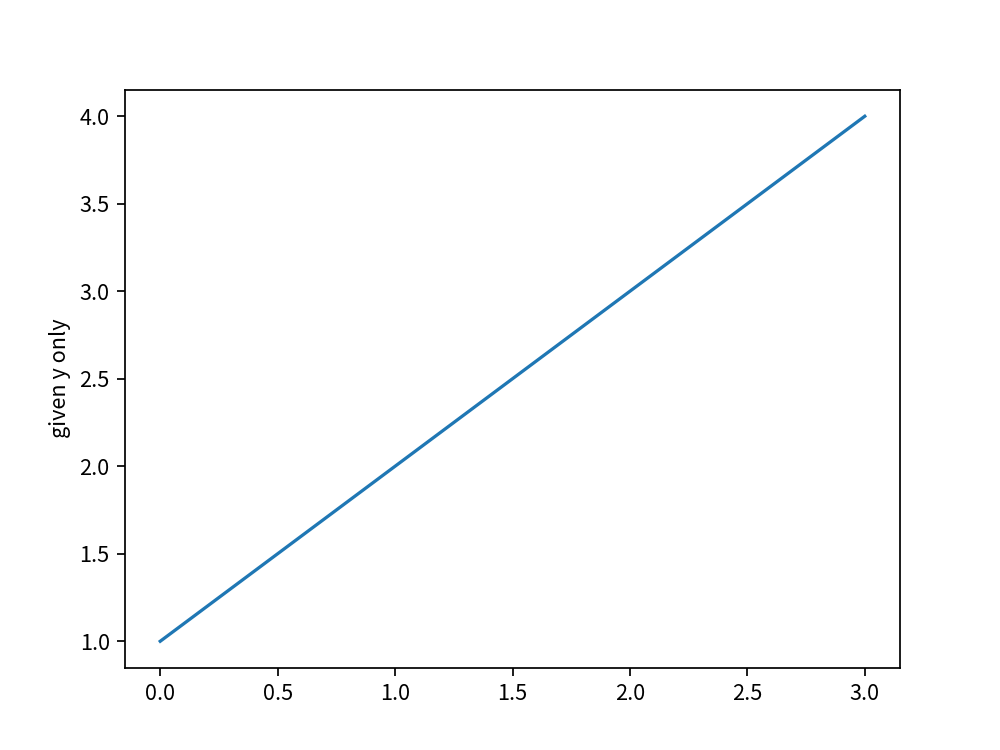

Text(0, 0.5, 'given y only')

In [5]:
fig, ax = plt.subplots()

# 只有給一個輸入，視為 y
ax.plot([1, 2, 3, 4])
# x 軸資料自動產生預設的 [0, 1, 2, 3]

# 設定 y 軸標籤
ax.set_ylabel('given y only')


### § `axes.plot( x, y )`

一般會同時明確指定 x, y 的數據陣列。

<IPython.core.display.Javascript object>


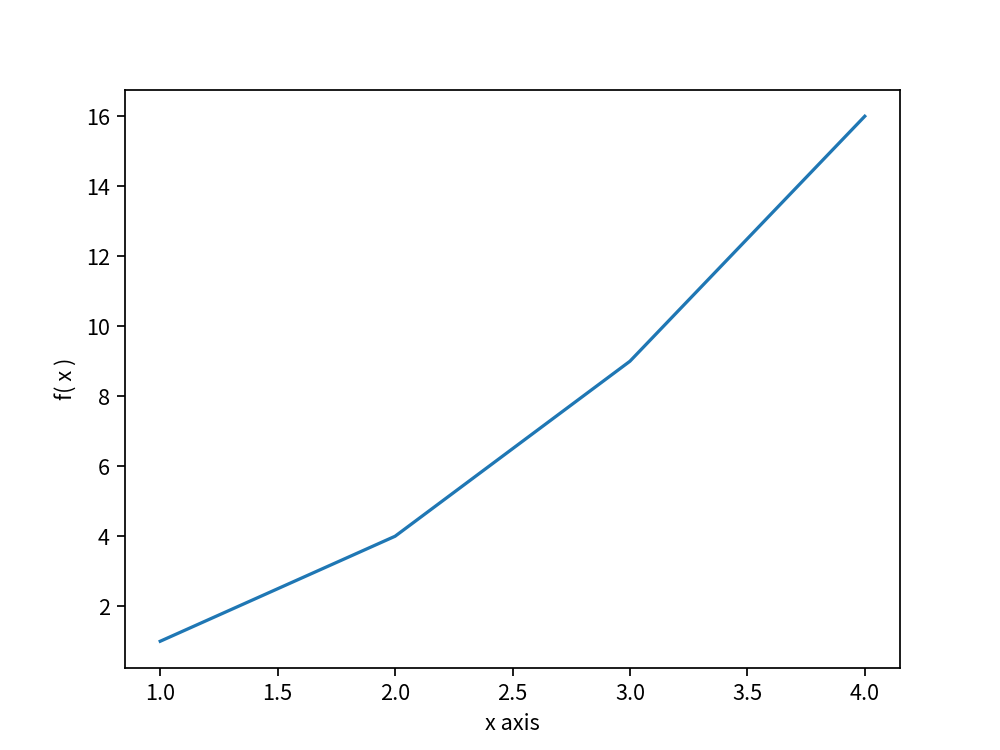

Text(0, 0.5, 'f( x )')

In [6]:
fig, ax = plt.subplots()

# 給一個輸入 x 及對應 y 函數的值
ax.plot([1, 2, 3, 4], [1, 4, 9, 16])

# 設定 x 軸標籤
ax.set_xlabel('x axis')
# 設定 y 軸標籤
ax.set_ylabel('f( x )')

### § 使用格式字串設定2D點、線形式

每一對 x, y 參數都可以提供一個圖示格式化字串的選項，用來指定顏色、線段樣式、以及點標記種類。 使用字母及符號來表示的格式化字串模仿自 **MATLAB** ，字串通常由代表顏色的字母接著代表點標記或線段樣式的符號，但顏色、線段樣式、點標記三種都為選用（optional）。 預設的格式化字串是 `'b-'`，代表藍色的實線段。 若不指定顏色，則 matplotlib 會按照內定的幾種顏色交替使用。

+ **顏色 Colors** - 用來代表顏色格式的字母。

| 字母     | 顏色           |
|----------|----------------|
| **'b'**  | blue 藍色      |
| **'g'**  | green 綠色     |
| **'r'**  | red 紅色       |
| **'c'**  | cyan 藍綠色    |
| **'m'**  | magenta 洋紅色 |
| **'y'**  | yellow 黃色    |
| **'k'**  | black 黑色     |
| **'w'**  | white 白色     |

Note: 如果格式化字串裡只用來指定顏色，另外還可以使用 **RGB 值的 hex 字串**，如 '#7F7F7F'。

+ **點標記 Markers** - 用來代表點標記的格式符號。

| 字母     | 標記描述              |
|----------|-----------------------|
| **'.'**  | point marker          |
| **','**  | pixel marker          |
| **'o'**  | circle marker         |
| **'v'**  | triangle_down marker  |
| **'^'**  | triangle_up marker    |
| **'<'**  | triangle_left marker  |
| **'>'**  | triangle_right marker |
| **'s'**  | square marker         |
| **'p'**  | pentagon marker       |
| **'\*'** | star marker           |
| **'h'**  | hexagon1 marker       |
| **'H'**  | hexagon2 marker       |
| **'+'**  | plus marker           |
| **'x'**  | x marker              |
| **'D'**  | diamond marker        |
| **'d'**  | thin_diamond marker   |
| **'\|'** | vertical line marker  |
| **'\_'** | horizontal line marker|

+ **線段樣式 Line Styles** - 用來代表線段樣式的格式符號。

| 字母     | 線段樣式描述          |
|----------|-----------------------|
| **'-'**  | solid line style      |
| **'--'** | dashed line style     |
| **'-.'** | dash-dot line style   |
| **':'**  | dotted line style     |

參閱 [axes.plot: format strings](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html)

<IPython.core.display.Javascript object>


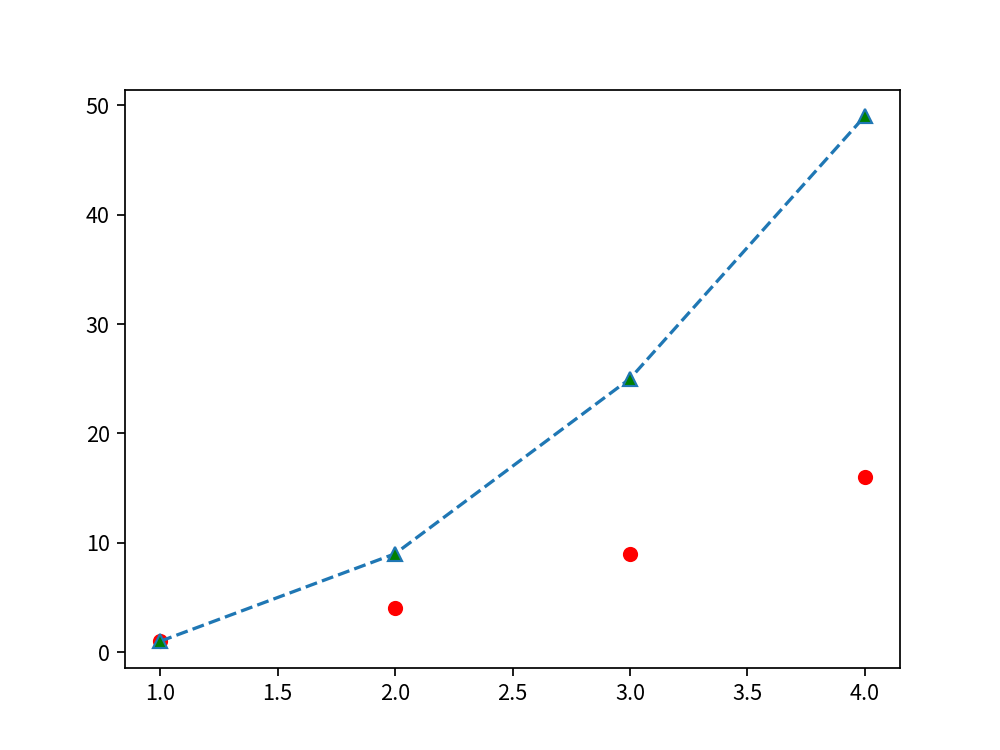

In [7]:
fig, ax = plt.subplots()

# 給 x 及 y，並指定資料點格式： 'ro' 同 keywords { color='r', marker='o', linestyle=''}
ax.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')

# 也可用 keyword 參數作細部設定
ax.plot([1, 2, 3, 4], [1, 9, 25, 49], markerfacecolor='g', marker='^', linestyle='--')


### § x, y 軸的 `xlim` 及 `ylim` 設定

The axis() command in the example takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes.

+ [`axes.axis()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axis.html)
+ [`axes.set_xlim()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlim.html)
+ [`axes.set_ylim()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylim.html)
+ `axes.set()`


<IPython.core.display.Javascript object>


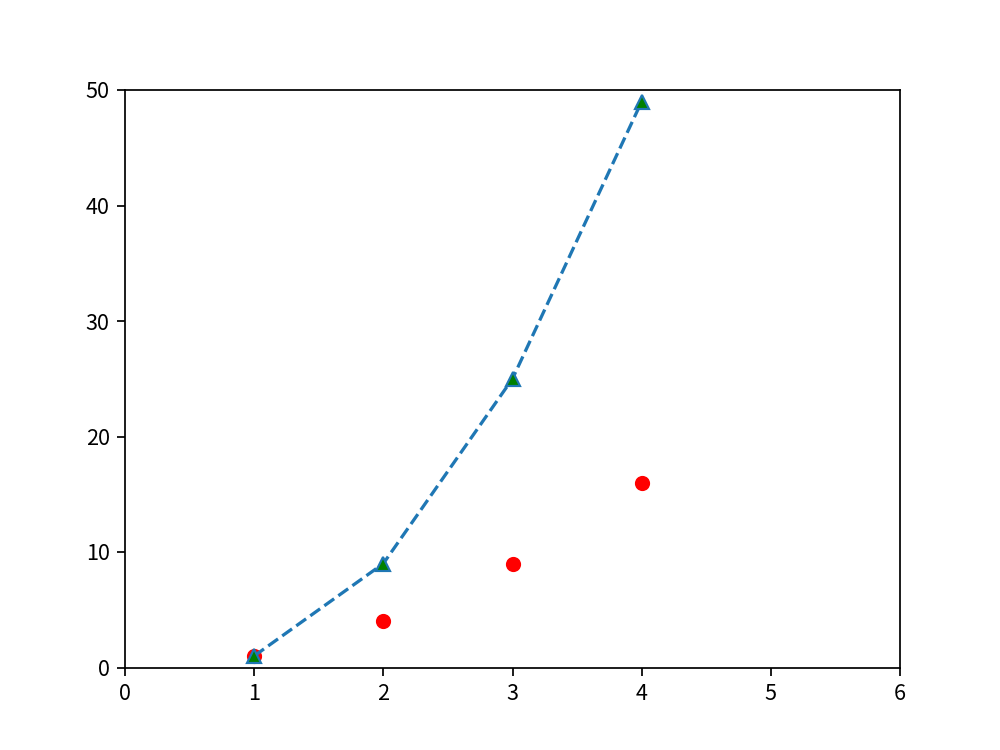

[0, 6, 0, 50]

In [8]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
ax.plot([1, 2, 3, 4], [1, 9, 25, 49], markerfacecolor='g', marker='^', linestyle='--')
# 指定 x, y 軸顯示區間
ax.axis([0, 6, 0, 50])

# 使用 set_xlim() 及 set_ylim() 的方法
#ax.set_xlim(0, 6)
#ax.set_ylim(0, 50)

# 使用通用屬性設定 set() 方法
#ax.set(xlim=[0, 6], ylim=[0, 50])

### § 指定多組 x, y 資料及樣式設定

除了上述的 `axes.plot([x], y, [format])` 用法外，還可以同時指定多組的 x, y 資料 `axes.plot([x1], y1, [format1], [x2], y2, [format2], ...)`。

<IPython.core.display.Javascript object>


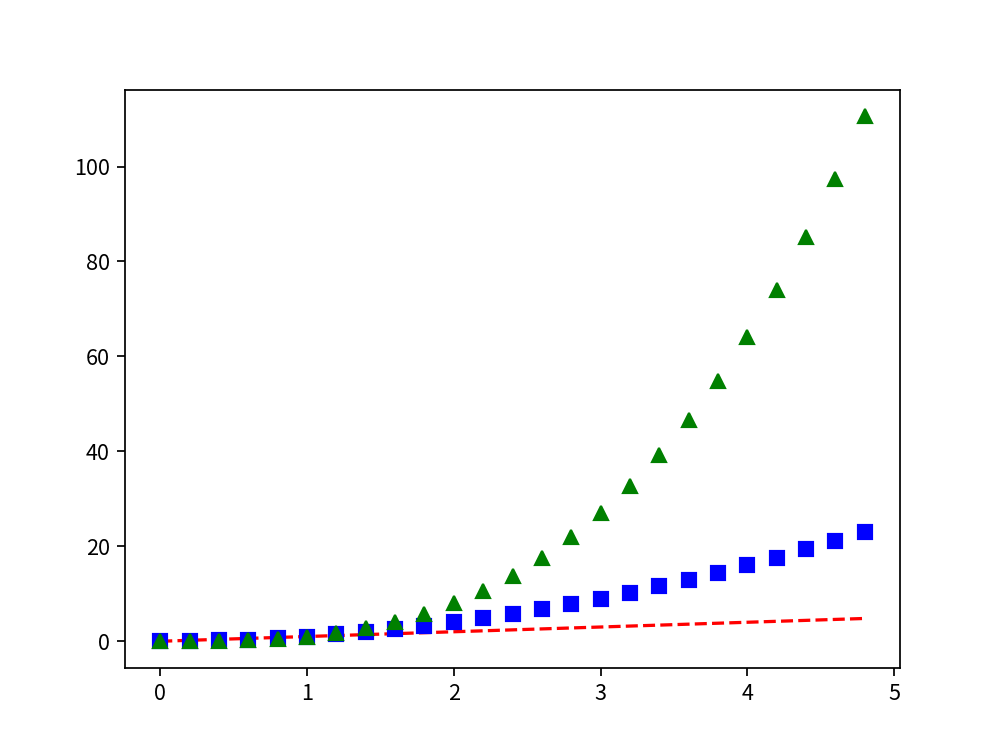

In [9]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

fig, ax = plt.subplots()
# red dashes, blue squares and green triangles
ax.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')


### § 使用 keyword 指定輸入資料

若用來儲存資料的容器，是要使用字串 keyword 的方式來存取數據，例如： `dict`, `numpy.recarray` 或 `pandas.DataFrame`。 matplotlib 的函式裡保留了使用這種資料容器的相容性，只要把資料物件用 `data` 關鍵字參數傳遞，原本的 x, y 及其他參數則用字串關鍵字對應容器裡的 key。

+ `axes.plot([x], y, [format], data=None)`
+ `axes.scatter(x, y, s=None, c=None, ..., data=None)`， s: (size) 點標記尺寸， c: (color) 點標記顏色。

<IPython.core.display.Javascript object>


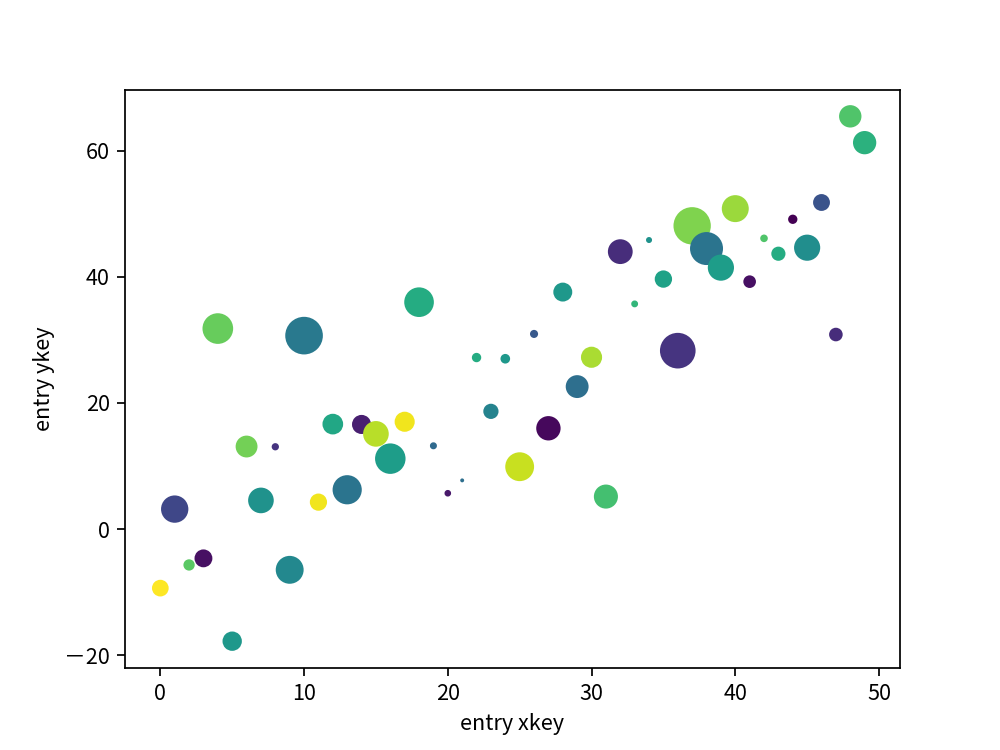

Text(0, 0.5, 'entry ykey')

In [10]:
data = {'xkey': np.arange(50),
        'color': np.random.randint(0, 50, 50),
        'size': np.abs(np.random.randn(50)) * 100 }
data['ykey'] = data['xkey'] + 10 * np.random.randn(50)

fig, ax = plt.subplots()
# 使用字串 key 指定
ax.scatter('xkey', 'ykey', c='color', s='size', data=data)

ax.set_xlabel('entry xkey')
ax.set_ylabel('entry ykey')

### § 類別資料呈現


<IPython.core.display.Javascript object>


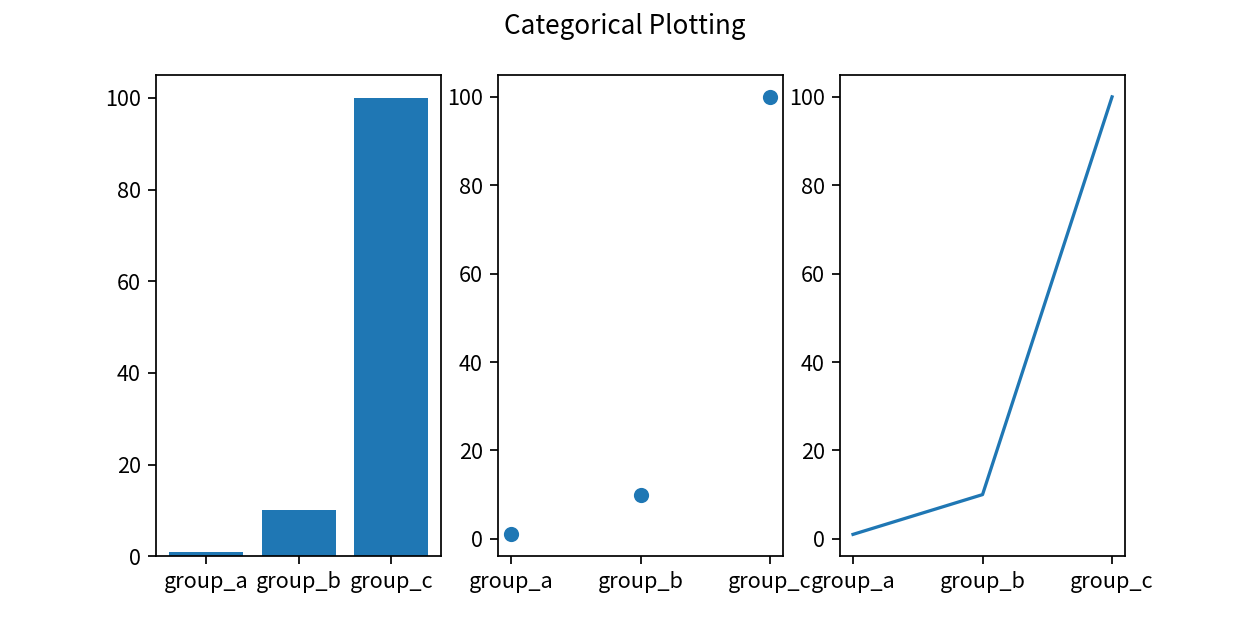

In [17]:
# 三個類別及對應數據
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

# figure 與 1 x 3 排列的 axes
fig, ax = plt.subplots(1, 3)
# 可以用 figsize 指定預設 figure 顯示大小
#fig, ax = plt.subplots(1, 3, figsize=(8,4))
fig.suptitle('Categorical Plotting')
# 第一個用條形圖
ax[0].bar(names, values)
# 第二個用散佈圖
ax[1].scatter(names, values)
# 第三個用點線圖
ax[2].plot(names, values)


### § 標註文字


<IPython.core.display.Javascript object>


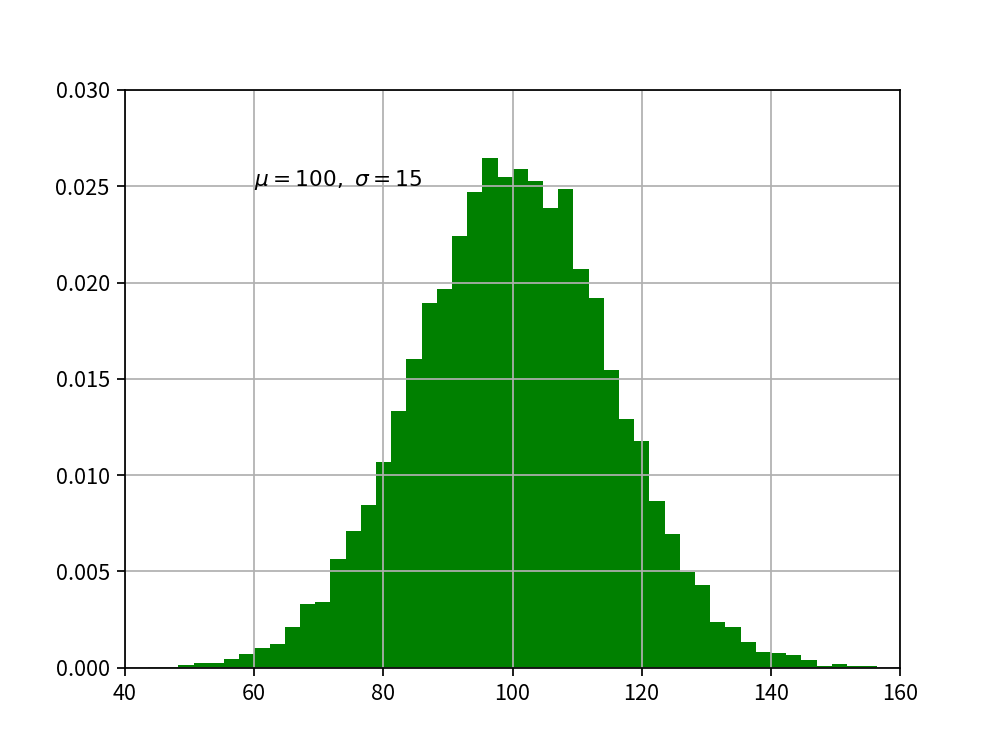

In [18]:
# 產生常態分佈亂數資料
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

fig, ax = plt.subplots()
# 資料的直方圖
n, bins, patches = ax.hist(x, bins=50, density=1, facecolor='g')
ax.text(60, .025, r'$\mu=100,\ \sigma=15$')
ax.axis([40, 160, 0, 0.03])
ax.grid(True)

## Matplotlib 官網繪圖範例

[**Matplotlib Gallery**](https://matplotlib.org/gallery/)